In [11]:
import gzip
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Open and read the gzip-compressed file
with gzip.open('20240614-London-listings.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Display column names
print("Column Names:")
print(df.columns.tolist())

# Display the first 20 rows of the data as a pandas table
print("\nFirst 20 Rows of Data:")
from IPython.display import display  # Use this for better display in Jupyter Notebook
display(df.head(40))




Column Names:
['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_location', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month']

First 20 Rows of Data:


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
0,1126718007114818432,https://www.airbnb.com/rooms/1126718007114818431,2024-06-14,Cozy house in Northolt,Located 1 minute away from a bus stop and 10 m...,380326752,Sadikshya,2020-12-15,NaN,False,2,2,['phone'],51.535030,-0.394000,Private room in home,Private room,2,1.5 baths,1.0,0.0,"[""Kitchen"", ""Free parking on premises"", ""Indoo...",48.0,3,365,269,0,NaN,NaN,NaN,NaN
1,702589406864297984,https://www.airbnb.com/rooms/702589406864297985,2024-06-15,Up in the sky in London!,"One bedroom with double bed, desk and with th...",77760754,Lena,2016-06-14,"London, United Kingdom",True,1,1,"['email', 'phone']",51.554232,-0.037135,Private room in casa particular,Private room,2,1 shared bath,1.0,0.0,"[""Free parking on premises"", ""First aid kit"", ...",42.0,1,365,146,83,2023-08-30,2024-06-13,4.94,8.56
2,1122535727514526720,https://www.airbnb.com/rooms/1122535727514526769,2024-06-14,Luxury Stays in SE London (2bed),Welcome to Our Home has recently refurbished o...,322107481,"Nick And Sandy,",2019-12-29,NaN,False,3,11,"['email', 'phone']",51.412310,0.026380,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Kitchen"", ""Free parking on premises"", ""Dedic...",150.0,6,365,162,0,NaN,NaN,NaN,NaN
3,904867371314200192,https://www.airbnb.com/rooms/904867371314200140,2024-06-14,"Free Parking: Luxury, Comfy, Near Airport, Net...",Delight in elegance near Heathrow. Sink into t...,517837625,Suite,2023-06-02,"London, United Kingdom",True,4,6,"['email', 'phone']",51.507197,-0.470938,Entire condo,Entire home/apt,3,1 bath,1.0,2.0,"[""Dining table"", ""Pack \u2019n play/Travel cri...",104.0,2,1125,208,14,2023-06-08,2024-05-17,4.93,1.13
4,809481748064671744,https://www.airbnb.com/rooms/809481748064671711,2024-06-15,4 min walk from the station 1 bedroom apartment,This indipendent apartment has a style. Well ...,30949469,Elisa,2015-04-10,"London, United Kingdom",False,2,7,"['email', 'phone']",51.568433,-0.036449,Entire condo,Entire home/apt,3,1 bath,1.0,2.0,"[""Dining table"", ""Cleaning products"", ""Cooking...",82.0,1,95,65,5,2024-04-21,2024-05-26,5.00,2.68
5,5570655,https://www.airbnb.com/rooms/5570655,2024-06-15,Fulham Garden Flat,Well decorated sunny garden flat in Fulham Par...,28880140,Carol,2015-03-06,NaN,True,2,2,"['email', 'phone']",51.472630,-0.208010,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Dining table"", ""Bathtub"", ""Cleaning products...",180.0,4,31,141,85,2015-04-13,2024-06-10,4.88,0.76
6,738113134161127040,https://www.airbnb.com/rooms/738113134161127067,2024-06-14,Warm contemporary B&B in stylish Victorian house.,You’ll love the stylish decor of this charming...,483663228,Donald,2022-10-15,NaN,True,2,2,"['email', 'phone']",51.607438,-0.001644,Private room in bed and breakfast,Private room,2,1 shared bath,1.0,1.0,"[""Dining table"", ""Cleaning products"", ""Bathtub...",50.0,2,31,309,19,2022-12-11,2024-05-11,5.00,1.03
7,940442256310109952,https://www.airbnb.com/rooms/940442256310109984,2024-06-14,Spacious room with a single bed,Enjoy a memorable visit when you stay in this ...,456550337,Mursal,2022-04-28,"London, United Kingdom",False,3,3,['phone'],51.439509,-0.378166,Shared room in home,Shared room,1,1 shared bath,1.0,1.0,"[""Kitchen"", ""Free parking on premises"", ""Exter...",150.0,5,365,269,0,NaN,NaN,NaN,NaN
8,1099376976665741440,https://www.airbnb.com/rooms/1099376976665741442,2024-06-14,Modern peaceful double room,Forget your worries in this spacious and seren...,551207872,Sue,2023-12-16,"Stanmore, United Kingdom",False,1,1,['phone'],51.601379,-0.309683,Private room in home,Private room,1,1 bath,1.0,1.0,"[""Kitchen"", 

In [48]:
airbnb = pd.read_csv("20240614-London-listings.csv.gz")

airbnb = gpd.GeoDataFrame(airbnb, 
                       geometry=gpd.points_from_xy(airbnb.longitude, airbnb.latitude), 
                       crs="EPSG:4326").to_crs(epsg=27700)

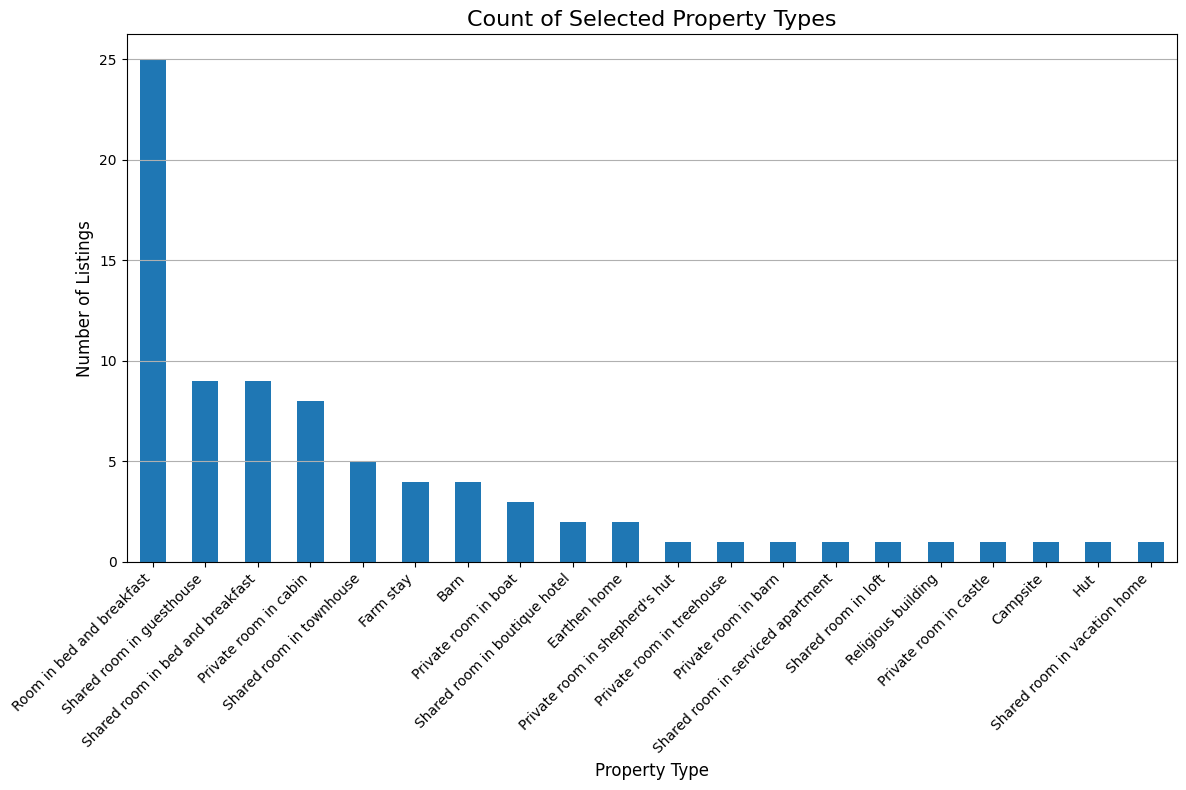

In [40]:
#Look at hosts that have multiple properties and what type of property they have - is there correlation to price? 

#Option 1 - What property types are listed by hosts with multiple properties?
import matplotlib.pyplot as plt

# Open and read the gzip-compressed file
with gzip.open('20240614-London-listings.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# List of property types to filter - I chose some but we need to review the list. 
property_filter = [
    'Shared room in guesthouse', 'Religious building', 'Hut',
    'Shared room in bed and breakfast', 'Campsite',
    'Room in bed and breakfast', 'Private room in boat',
    'Shared room in townhouse', 'Private room in cabin', 
    'Private room in castle', 'Shared room in serviced apartment',
    'Shared room in loft', 'Earthen home',
    "Private room in shepherd's hut", 'Barn',
    'Shared room in boutique hotel', 'Private room in barn', 'Farm stay',
    'Private room in treehouse', 'Shared room in vacation home'
]

# Filter the dataset for the specified property types
filtered_df = df[df['property_type'].isin(property_filter)]

# Count the occurrences of each property type
property_counts = filtered_df['property_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 8))
property_counts.plot(kind='bar')
plt.title('Count of Selected Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()



This chart shows which property types are most commonly listed by hosts with multiple properties.

In [41]:
# List all unique property types
property_types = df['property_type'].unique()

# Display the list
print("List of Property Types:")
print(property_types)

List of Property Types:
['Private room in home' 'Private room in casa particular'
 'Entire rental unit' 'Entire condo' 'Private room in bed and breakfast'
 'Shared room in home' 'Entire home' 'Private room in condo'
 'Shared room in rental unit' 'Entire serviced apartment'
 'Private room in rental unit' 'Entire guesthouse'
 'Private room in townhouse' 'Entire loft' 'Boat' 'Camper/RV'
 'Private room in loft' 'Entire guest suite' 'Private room in guest suite'
 'Entire townhouse' 'Private room in guesthouse' 'Room in aparthotel'
 'Entire home/apt' 'Room in hotel' 'Room in boutique hotel'
 'Casa particular' 'Private room in nature lodge'
 'Private room in farm stay' 'Shared room in hostel' 'Entire villa'
 'Entire vacation home' 'Room in rental unit'
 'Private room in serviced apartment' 'Private room in religious building'
 'Castle' 'Shared room in condo' 'Private room in hostel' 'Entire cottage'
 'Room in serviced apartment' 'Private room' 'Private room in tiny home'
 'Private room in vil

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Filter superhosts and normal hosts
superhosts = df[df['host_is_superhost'] == True]
normal_hosts = df[df['host_is_superhost'] == False]

# Calculate average ratings
avg_rating_superhosts = superhosts['review_scores_rating'].mean()
avg_rating_normal = normal_hosts['review_scores_rating'].mean()

# Calculate average number of reviews
avg_reviews_superhosts = superhosts['number_of_reviews'].mean()
avg_reviews_normal = normal_hosts['number_of_reviews'].mean()

# Perform t-tests for ratings and review counts
rating_ttest = ttest_ind(superhosts['review_scores_rating'].dropna(), 
                         normal_hosts['review_scores_rating'].dropna())
reviews_ttest = ttest_ind(superhosts['number_of_reviews'].dropna(), 
                          normal_hosts['number_of_reviews'].dropna())

# Print results


Average Rating (Superhosts): 4.8526894835096455
Average Rating (Normal Hosts): 4.655449798739273
T-Test for Ratings: p-value = 0.0
Average Number of Reviews (Superhosts): 44.09402104776223
Average Number of Reviews (Normal Hosts): 15.563552669684638
T-Test for Reviews: p-value = 0.0


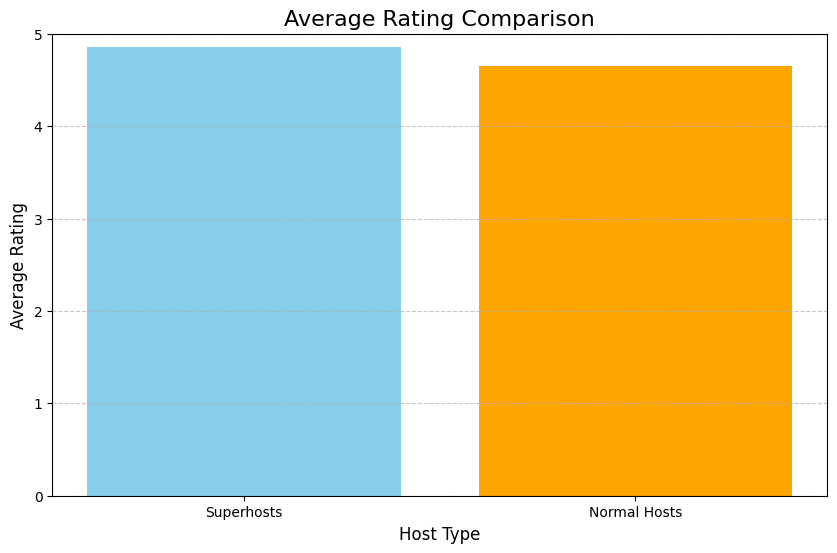

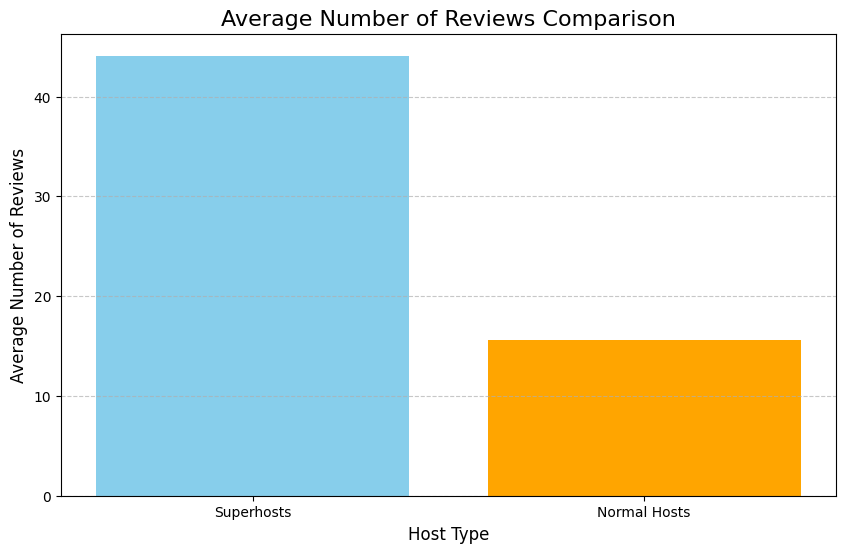

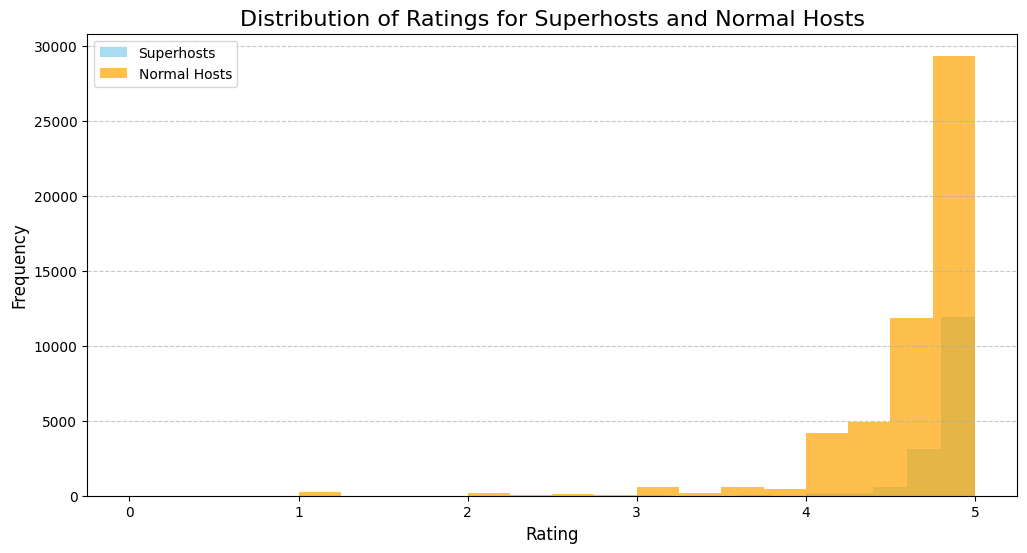

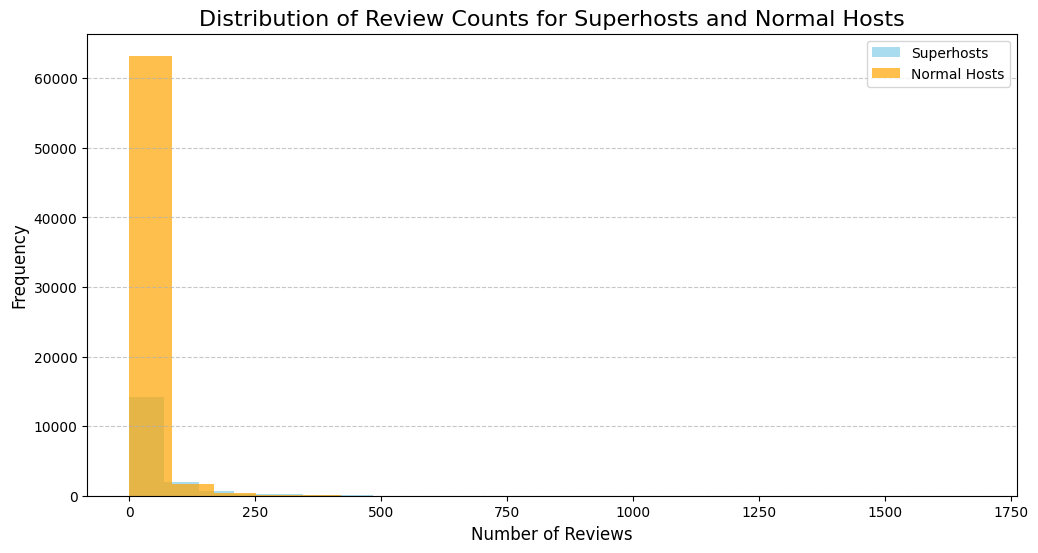

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Remove rows where review_scores_rating or number_of_reviews is NaN
filtered_superhosts = superhosts.dropna(subset=['review_scores_rating', 'number_of_reviews'])
filtered_normal_hosts = normal_hosts.dropna(subset=['review_scores_rating', 'number_of_reviews'])

# Filter superhosts and normal hosts
superhosts = df[df['host_is_superhost'] == True]
normal_hosts = df[df['host_is_superhost'] == False]

# Calculate average ratings
avg_rating_superhosts = superhosts['review_scores_rating'].mean()
avg_rating_normal = normal_hosts['review_scores_rating'].mean()

# Calculate average number of reviews
avg_reviews_superhosts = superhosts['number_of_reviews'].mean()
avg_reviews_normal = normal_hosts['number_of_reviews'].mean()

# Perform t-tests for ratings and review counts
rating_ttest = ttest_ind(superhosts['review_scores_rating'].dropna(), 
                         normal_hosts['review_scores_rating'].dropna())
reviews_ttest = ttest_ind(superhosts['number_of_reviews'].dropna(), 
                          normal_hosts['number_of_reviews'].dropna())

# Print results
print(f"Average Rating (Superhosts): {avg_rating_superhosts}")
print(f"Average Rating (Normal Hosts): {avg_rating_normal}")
print(f"T-Test for Ratings: p-value = {rating_ttest.pvalue}")

print(f"Average Number of Reviews (Superhosts): {avg_reviews_superhosts}")
print(f"Average Number of Reviews (Normal Hosts): {avg_reviews_normal}")
print(f"T-Test for Reviews: p-value = {reviews_ttest.pvalue}")

# Bar plot for average ratings with reduced scale
plt.figure(figsize=(10, 6))
plt.bar(['Superhosts', 'Normal Hosts'], [avg_rating_superhosts, avg_rating_normal], color=['skyblue', 'orange'])
plt.title('Average Rating Comparison', fontsize=16)
plt.ylabel('Average Rating', fontsize=12)
plt.xlabel('Host Type', fontsize=12)
plt.ylim(0, 5)  # Set y-axis limit to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for average number of reviews
plt.figure(figsize=(10, 6))
plt.bar(['Superhosts', 'Normal Hosts'], [avg_reviews_superhosts, avg_reviews_normal], color=['skyblue', 'orange'])
plt.title('Average Number of Reviews Comparison', fontsize=16)
plt.ylabel('Average Number of Reviews', fontsize=12)
plt.xlabel('Host Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution plot for review scores
plt.figure(figsize=(12, 6))
plt.hist(superhosts['review_scores_rating'].dropna(), bins=20, alpha=0.7, label='Superhosts', color='skyblue')
plt.hist(normal_hosts['review_scores_rating'].dropna(), bins=20, alpha=0.7, label='Normal Hosts', color='orange')
plt.title('Distribution of Ratings for Superhosts and Normal Hosts', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution plot for number of reviews
plt.figure(figsize=(12, 6))
plt.hist(superhosts['number_of_reviews'].dropna(), bins=20, alpha=0.7, label='Superhosts', color='skyblue')
plt.hist(normal_hosts['number_of_reviews'].dropna(), bins=20, alpha=0.7, label='Normal Hosts', color='orange')
plt.title('Distribution of Review Counts for Superhosts and Normal Hosts', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [59]:
# List all unique room types
room_types = df['room_type'].unique()

# Display the list
print("List of Property Types:")
print(room_types)

List of Property Types:
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hx/nq0j7wp55pjfpp7z0vshyl_00000gn/T/ipykernel_1089/3289655380.py:8: SyntaxWarning: invalid escape sequence '\$'
  multiple_listings['price'] = multiple_listings['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/hx/nq0j7wp55pjfpp7z0vshyl_00000gn/T/ipykernel_1089/3289655380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_listings['price'] = multiple_listings['price'].replace('[\$,]', '', regex=True).astype(float)


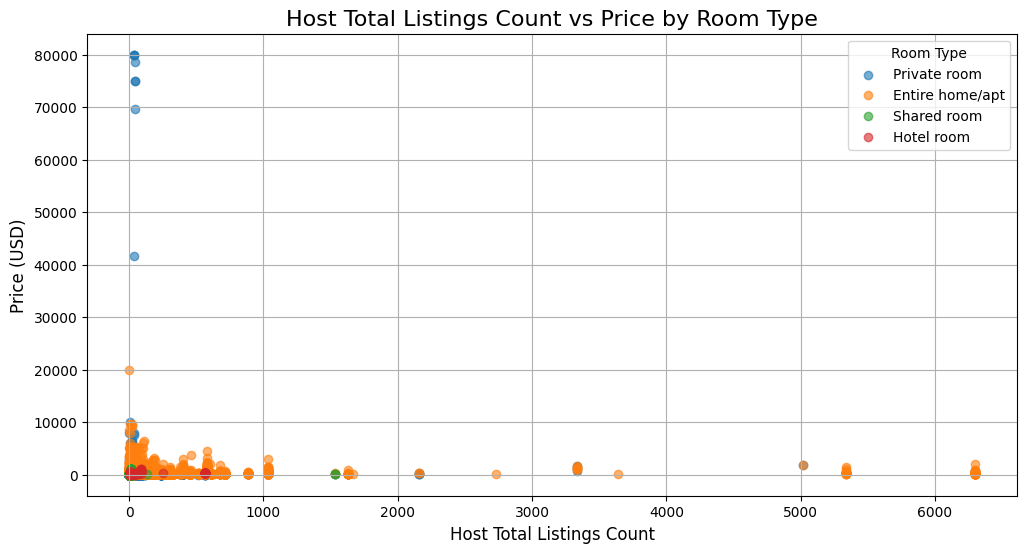

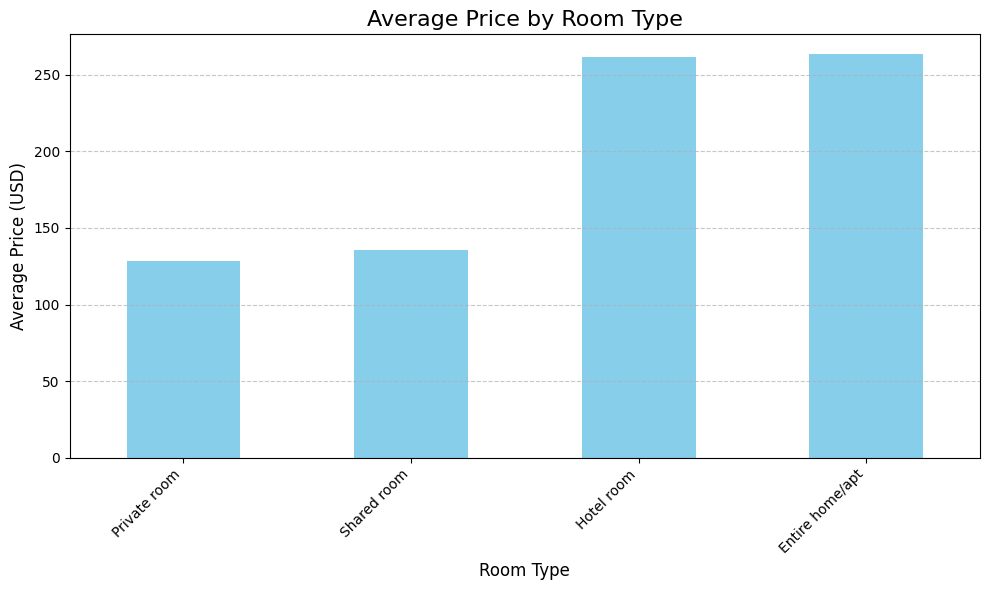

Correlation between Host Total Listings Count and Price by Room Type:
Private room: 0.02
Entire home/apt: 0.04
Shared room: -0.01
Hotel room: 0.11


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for hosts with multiple listings
multiple_listings = df[df['host_total_listings_count'] > 1]

# Ensure 'price' is numeric (remove formatting issues if needed)
multiple_listings['price'] = multiple_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by room type and calculate average price
room_type_avg_price = multiple_listings.groupby('room_type')['price'].mean()

# Scatter plot: Number of listings vs price for each room type
plt.figure(figsize=(12, 6))
for room_type in multiple_listings['room_type'].unique():
    subset = multiple_listings[multiple_listings['room_type'] == room_type]
    plt.scatter(subset['host_total_listings_count'], subset['price'], label=room_type, alpha=0.6)

plt.title('Host Total Listings Count vs Price by Room Type', fontsize=16)
plt.xlabel('Host Total Listings Count', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Room Type')
plt.grid(True)
plt.show()

# Bar plot: Average price by room type
plt.figure(figsize=(10, 6))
room_type_avg_price.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation analysis: Price vs host_total_listings_count
correlation_results = {}
for room_type in multiple_listings['room_type'].unique():
    subset = multiple_listings[multiple_listings['room_type'] == room_type]
    correlation = subset['host_total_listings_count'].corr(subset['price'])
    correlation_results[room_type] = correlation

# Display correlation results
print("Correlation between Host Total Listings Count and Price by Room Type:")
for room_type, corr in correlation_results.items():
    print(f"{room_type}: {corr:.2f}")



<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hx/nq0j7wp55pjfpp7z0vshyl_00000gn/T/ipykernel_1089/797258741.py:12: SyntaxWarning: invalid escape sequence '\$'
  df_cleaned['price'] = df_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     3.090
Date:                Tue, 03 Dec 2024   Prob (F-statistic):              0.221
Time:                        12:32:09   Log-Likelihood:                -20.061
No. Observations:                   4   AIC:                             44.12
Df Residuals:                       2   BIC:                             42.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               260.5572     43.14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


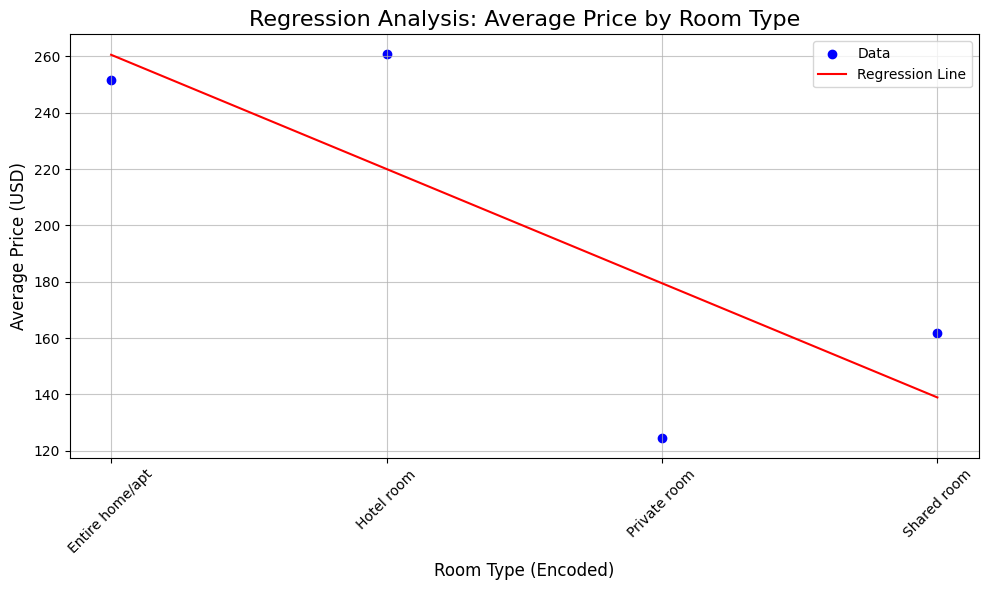

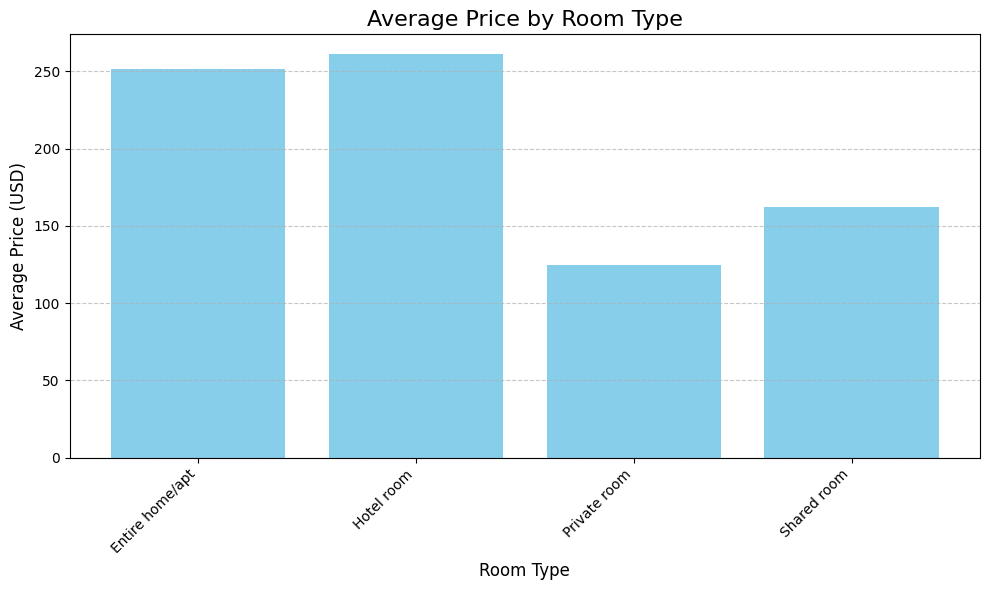

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter data to remove NaN values in 'price' and 'room_type'
df_cleaned = df.dropna(subset=['price', 'room_type']).copy()

# Ensure 'price' is numeric
df_cleaned['price'] = df_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the average price by room type
avg_price_by_room_type = df_cleaned.groupby('room_type')['price'].mean().reset_index()

# Encode room_type as a categorical variable
label_encoder = LabelEncoder()
avg_price_by_room_type['room_type_encoded'] = label_encoder.fit_transform(avg_price_by_room_type['room_type'])

# Independent and dependent variables for regression
X = avg_price_by_room_type[['room_type_encoded']]  # Encoded room types
y = avg_price_by_room_type['price']

# Add a constant for regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_price_by_room_type['room_type_encoded'], avg_price_by_room_type['price'], color='blue', label='Data')
plt.plot(avg_price_by_room_type['room_type_encoded'], model.predict(X), color='red', label='Regression Line')
plt.title('Regression Analysis: Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type (Encoded)', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(ticks=avg_price_by_room_type['room_type_encoded'], labels=avg_price_by_room_type['room_type'], rotation=45)
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

# Bar plot of average price by room type
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_room_type['room_type'], avg_price_by_room_type['price'], color='skyblue')
plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
